# Resume Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

###  Importing libraries

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv(r"C:\Users\yashika\datasets_118409_284260_resume_dataset.csv" ,encoding='utf-8')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [5]:
print ("Displaying the distinct categories of resume -\n")
print (df['Category'].unique())

Displaying the distinct categories of resume -

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [6]:
print ("Displaying the number of records belonging to distinct categories of resume -\n")
print (df['Category'].value_counts())

Displaying the number of records belonging to distinct categories of resume -

Java Developer               14
HR                           11
Database                     11
Data Science                 10
Advocate                     10
Testing                       7
Automation Testing            7
DotNet Developer              7
DevOps Engineer               7
Hadoop                        7
SAP Developer                 6
Health and fitness            6
Business Analyst              6
Python Developer              6
Arts                          6
Civil Engineer                6
Network Security Engineer     5
Electrical Engineering        5
Blockchain                    5
ETL Developer                 5
Sales                         5
Mechanical Engineer           5
Web Designing                 5
Operations Manager            4
PMO                           3
Name: Category, dtype: int64


In [7]:
df['Category'].nunique()

25

### Visualisation of category

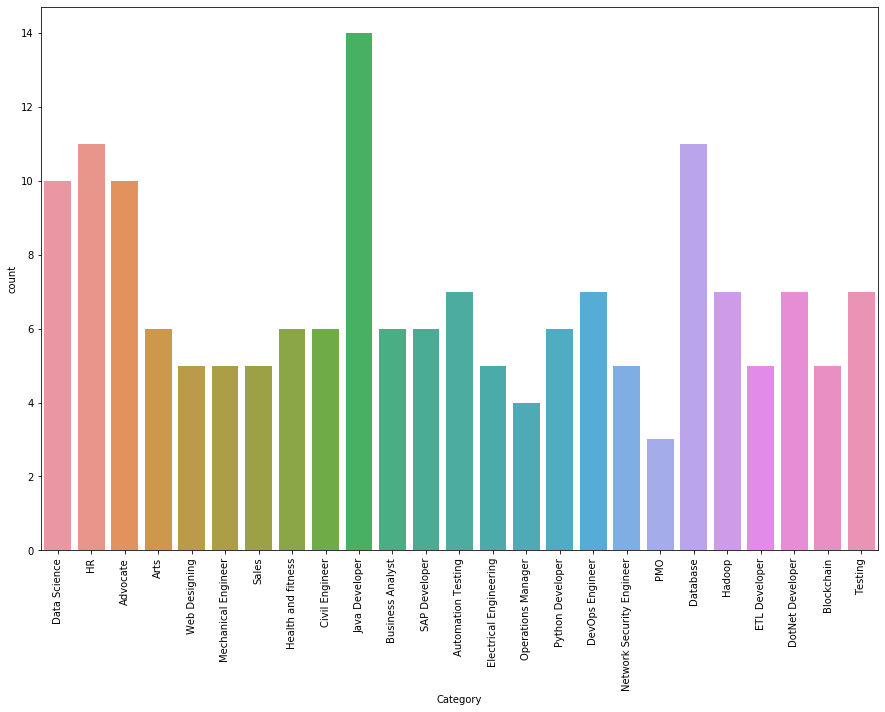

In [8]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x="Category", data=df)

### Label encoding

In [9]:
# Label encoding of the category column

le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])

df.head()

,Category,Resume
0,6,Skills * Programming Languages: Python (pandas...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...
2,6,"Areas of Interest Deep Learning, Control Syste..."
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab..."


### Text preprocessing


- Removing punctuations
- Removing stopwords
- Porter Stemmer

In [10]:
ps = PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')
def get_clean(x):
    x = re.sub('[^a-zA-Z]', ' ', x).lower().split()
    x = ' '.join([ps.stem(word) for word in x if word not in stopwords])
    return x

In [11]:
df['Resume'] = df['Resume'].apply(lambda x : get_clean(x)) 

In [12]:
df.head()

,Category,Resume
0,6,skill program languag python panda numpi scipi...
1,6,educ detail may may b e uit rgpvdata scientist...
2,6,area interest deep learn control system design...
3,6,skill r python sap hana tableau sap hana sql s...
4,6,educ detail mca ymcaust faridabad haryanadata ...


### TF-IDF Vectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000,ngram_range = (1,3))
X = tfidf.fit_transform(df['Resume'])
y = df['Category']

In [14]:
print(tfidf.get_feature_names())

['abap', 'abil', 'abil work', 'abl', 'abstract', 'academ', 'academi', 'accentur', 'accept', 'accept test', 'access', 'accomplish', 'accord', 'account', 'accur', 'achiev', 'achiev target', 'acquir', 'across', 'act', 'action', 'activ', 'activ involv', 'activ monitor', 'activ particip', 'activ plc', 'activ plc panel', 'activ project', 'actual', 'actuat', 'ad', 'ad hoc', 'adapt', 'add', 'addit', 'address', 'adher', 'admin', 'administr', 'administr support', 'administr task', 'advanc', 'advertis', 'advisor', 'aegi', 'aegi school', 'aegi school data', 'agent', 'agil', 'agil methodolog', 'agil model', 'agil model methodolog', 'ai', 'aim', 'air', 'ajax', 'ajax exprienc', 'ajax java', 'ajax java script', 'ajax jqueri', 'al', 'alert', 'algorithm', 'alloc', 'allow', 'along', 'also', 'also work', 'altern', 'alway', 'amazon', 'american', 'among', 'amravati', 'amravati maharashtra', 'amravati univers', 'analys', 'analysi', 'analyst', 'analystbusi', 'analyt', 'analyt skill', 'analyz', 'analyz user', 

In [15]:
data_sample_1 = df[:2]
tfidf1 = TfidfVectorizer()

data_2_tfidf = tfidf1.fit_transform(data_sample_1['Resume'])

In [16]:
data_2_tfidf.shape

(2, 346)

In [17]:
df_tfidf = pd.DataFrame(data_2_tfidf.toarray(),columns =tfidf1.get_feature_names())
df_tfidf.head()

,acceler,account,achiev,across,action,address,aditya,advanc,also,analysi,...,vec,vehicl,via,vision,visual,winter,word,work,year,young
0,0.026709,0.026709,0.000000,0.080128,0.026709,0.026709,0.000000,0.026709,0.026709,0.213675,...,0.053419,0.026709,0.026709,0.026709,0.053419,0.000000,0.160256,0.019004,0.019004,0.053419
1,0.000000,0.000000,0.069665,0.000000,0.000000,0.000000,0.069665,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.069665,0.000000,0.049567,0.297403,0.000000


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20)

In [29]:
print('X_train shape :',X_train.shape)
print('y_train shape :',y_train.shape)
print('X_val shape :',X_val.shape)
print('y_val shape :',y_val.shape)

X_train shape : (135, 3000)
y_train shape : (135,)
X_val shape : (34, 3000)
y_val shape : (34,)


# Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train,y_train)
y_pred_log = log.predict(X_val)

In [31]:
print('Accuracy of Logistic Classifier: {:.2f}'.format(accuracy_score(y_val,y_pred_log)))

Accuracy of SVC Classifier: 0.62


### Grid search

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [33]:
log = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,0.01,1,5,10,25]}
grid_log_acc = GridSearchCV(log, param_grid = grid_values)
grid_log_acc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
#Predict values based on new parameters
y_pred_log_acc = grid_log_acc.predict(X_val)

# New Model Evaluation metrics 
print('Accuracy Score : ' , accuracy_score(y_val,y_pred_log_acc))

Accuracy Score :  0.8235294117647058


In [35]:
df_log = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred_log_acc})

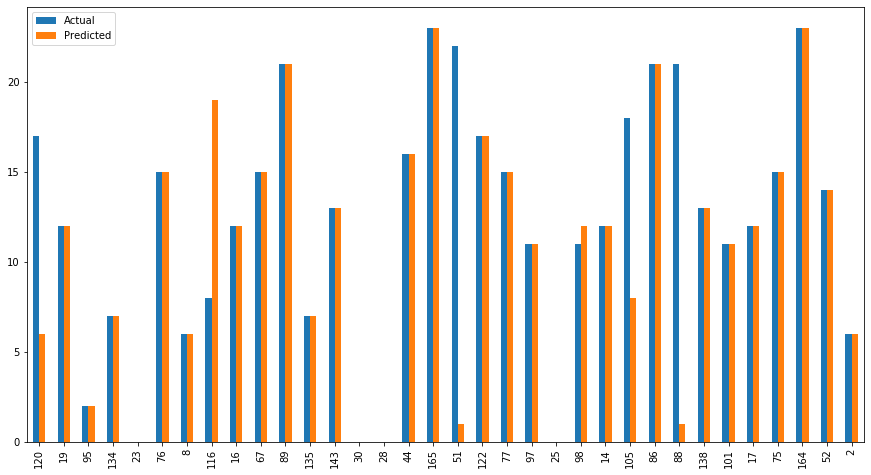

In [36]:
df_log.plot(kind = 'bar',figsize=(15,8))
plt.show()

# SVC

In [37]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
y_pred_svc = classifier.predict(X_val)

In [39]:
print('Accuracy of SVC Classifier: {:.2f}'.format(accuracy_score(y_val,y_pred_svc)))

Accuracy of SVC Classifier: 0.53


### Grid search 

In [40]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [52]:
grid_svc_acc = GridSearchCV(classifier, param_grid)
grid_svc_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_svc_acc = grid_svc_acc.predict(X_val)

# New Model Evaluation metrics 
print('Accuracy Score : ' , accuracy_score(y_val,y_pred_svc_acc))


Accuracy Score :  0.7941176470588235


In [51]:
df_svc = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred_svc_acc})

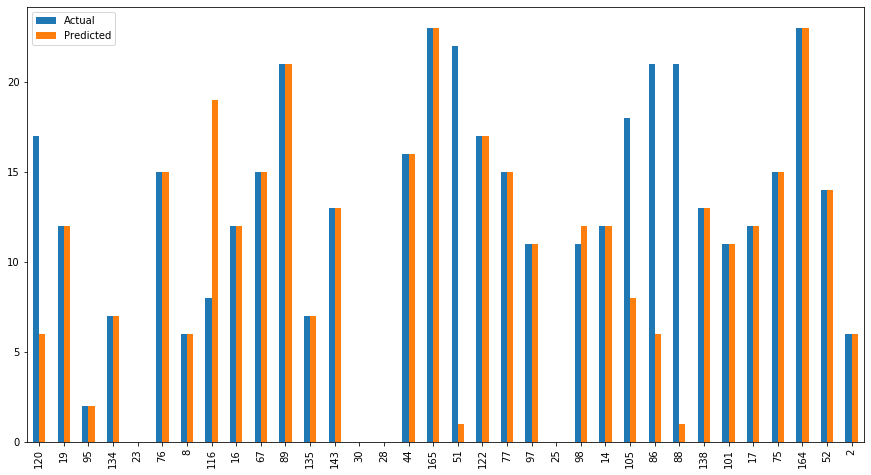

In [43]:
df_svc.plot(kind = 'bar',figsize=(15,8))
plt.show()

# Random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
clf_rf=RandomForestClassifier(n_estimators=200)

clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
y_pred_rf=clf_rf.predict(X_val)

In [47]:
print('Accuracy of SVC Classifier: {:.2f}'.format(accuracy_score(y_val,y_pred_rf)))

Accuracy of SVC Classifier: 0.74


### Grid search

In [48]:
param_grid_rf = {"n_estimators": np.arange(2, 300, 2)}

In [53]:
grid_rf_acc = GridSearchCV(clf_rf, param_grid_rf)
grid_rf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_rf_acc = grid_rf_acc.predict(X_val)

# New Model Evaluation metrics 
print('Accuracy Score : ', accuracy_score(y_val,y_pred_rf_acc))

Accuracy Score :  0.7647058823529411


In [54]:
df_rf = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred_rf_acc})

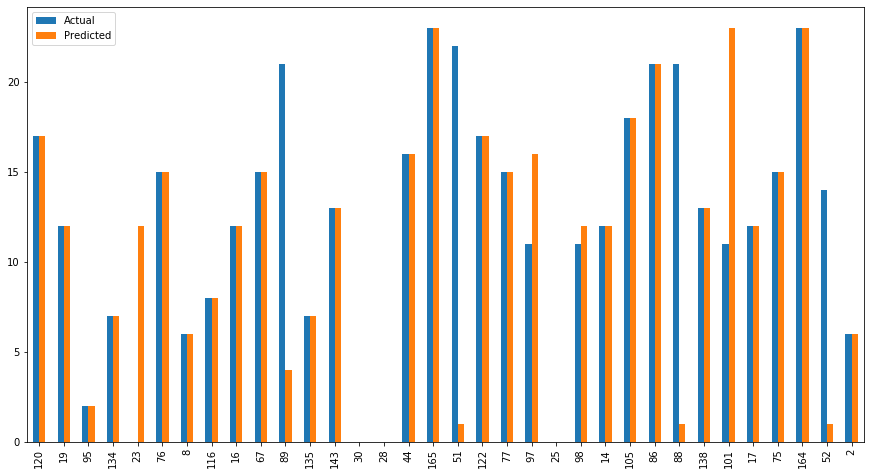

In [55]:
df_rf.plot(kind = 'bar',figsize=(15,8))
plt.show()

In [56]:
y_val_inverse = le.inverse_transform(y_val)

In [57]:
predicted_inverse = le.inverse_transform(y_pred_log_acc)

In [64]:
df_1 = pd.DataFrame({'Actual': y_val_inverse, 'Predicted': predicted_inverse})
df_1[1:7]

,Actual,Predicted
1,HR,HR
2,Automation Testing,Automation Testing
3,Database,Database
4,Advocate,Advocate
5,Java Developer,Java Developer
6,Data Science,Data Science


## Single prediction

In [75]:
text = "KEY SKILLS: Ã¢Â€Â¢ Computerized accounting with tally Ã¢Â€Â¢ Sincere & hard working Ã¢Â€Â¢ Management accounting & income tax Ã¢Â€Â¢ Good communication & leadership Ã¢Â€Â¢ Two and four wheeler driving license Ã¢Â€Â¢ Internet & Ecommerce management COMPUTER SKILLS: Ã¢Â€Â¢ C Language Ã¢Â€Â¢ Web programing Ã¢Â€Â¢ Tally Ã¢Â€Â¢ Dbms Education Details June 2017 to June 2019 Mba Finance/hr India Mlrit June 2014 to June 2017 Bcom Computer Hyderabad, Telangana Osmania university June 2012 to April 2014 Inter MEC India SrimedhavHrNaniSkill Details accounting- Exprience - 6 months DATABASE MANAGEMENT SYSTEM- Exprience - 6 months Dbms- Exprience - 6 months Management accounting- Exprience - 6 months Ecommerce- Exprience - 6 monthsCompany Details company - Valuelabs description - They will give the RRF form the required DLT then the hand over to RLT then scrum master will take the form from the RLT then scrum master will give the forms to trainee which we can work on the requirement till the candidate receive the offer from the company"

In [81]:
text = get_clean(text)
print(text)

proper hr manag requir orderli approach abil organ file manag other time well maintain high level person effici necessari skill success hr manag


In [82]:
vec = tfidf.transform([text])

In [83]:
predict = grid_log_acc.predict(vec)
predict

array([12])

In [84]:
y_pred = le.inverse_transform(predict)
y_pred

array(['HR'], dtype=object)

### Another example

In [85]:
text_ds = "Machine learning , Deep learning ,Python, Statistics" 

In [86]:
text_ds = get_clean(text_ds)
print(text_ds)

machin learn deep learn python statist


In [87]:
vec = tfidf.transform([text_ds])

In [88]:
predict = grid_log_acc.predict(vec)
predict

array([6])

In [89]:
y_pred = le.inverse_transform(predict)
y_pred

array(['Data Science'], dtype=object)